

*   Name: Devin Augustin
*   NIM: 2440094352
*   Link Video: https://drive.google.com/file/d/1-rWhetRR-KfTmZyHo0DWrwZGXwDyTGSL/view?usp=sharing





In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d gpiosenka/butterfly-images40-species

butterfly-images40-species.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip butterfly-images40-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/MILBERTS TORTOISESHELL/111.jpg  
  inflating: train/MILBERTS TORTOISESHELL/112.jpg  
  inflating: train/MILBERTS TORTOISESHELL/113.jpg  
  inflating: train/MILBERTS TORTOISESHELL/114.jpg  
  inflating: train/MILBERTS TORTOISESHELL/115.jpg  
  inflating: train/MILBERTS TORTOISESHELL/116.jpg  
  inflating: train/MILBERTS TORTOISESHELL/117.jpg  
  inflating: train/MILBERTS TORTOISESHELL/118.jpg  
  inflating: train/MILBERTS TORTOISESHELL/119.jpg  
  inflating: train/MILBERTS TORTOISESHELL/120.jpg  
  inflating: train/MILBERTS TORTOISESHELL/121.jpg  
  inflating: train/MILBERTS TORTOISESHELL/122.jpg  
  inflating: train/MILBERTS TORTOISESHELL/123.jpg  
  inflating: train/MILBERTS TORTOISESHELL/124.jpg  
  inflating: train/MILBERTS TORTOISESHELL/125.jpg  
  inflating: train/MILBERTS TORTOISESHELL/126.jpg  
  inflating: train/MILBERTS TORTOISESHELL/127.jpg  
  inflating: train/MILBERTS TORTOISESHELL/128.jpg  
  inflating: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import tensorflow as tf

!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-fyiqea36
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-fyiqea36


In [ ]:
train_dir = '/content/train'
test_dir = '/content/test'
valid_dir = '/content/valid'

In [ ]:
#Import pathlib
import pathlib

#Define train, test, validation data paths dir 
train_dir = pathlib.Path(train_dir)
test_dir = pathlib.Path(test_dir)
validation_dir = pathlib.Path(valid_dir)

In [ ]:
train_image_count = len(list(train_dir.glob('*/*.jpg')))
test_image_count = len(list(test_dir.glob('*/*.jpg')))
validation_image_count = len(list(validation_dir.glob('*/*.jpg')))

print('There are ', train_image_count, 'images in the train dir.')
print('There are ', test_image_count, 'images in the test dir.')
print('There are ', validation_image_count, 'images in the validation dir.')

There are  12639 images in the train dir.
There are  500 images in the test dir.
There are  500 images in the validation dir.


In [ ]:
#Define some parameters
batch_size = 32
img_height = 32
img_width = 32
n_train = 12639
steps_per_epoch = n_train//batch_size

In [ ]:
#Trainset 
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12639 files belonging to 100 classes.


In [ ]:
#Testset
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files belonging to 100 classes.


In [ ]:
#Validationset
validation_ds = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files belonging to 100 classes.


In [ ]:
#List of classes in each dataset
train_class_names = train_ds.class_names
test_class_names = test_ds.class_names
validation_class_names = validation_ds.class_names

Let's visualize some of the butterflies.

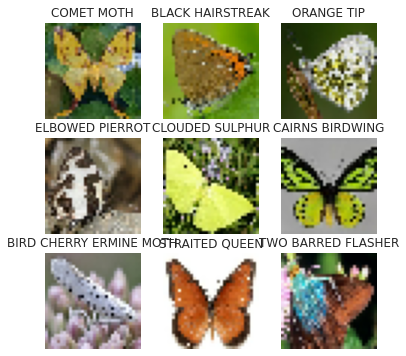

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size= AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#Def function to compile and train the models
def compile_and_train(model, name):
  #compile the model

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics='accuracy')
    
  #train the model 
  history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs = 20)
  return history

In [ ]:
#Define the number of classes 
num_classes = len(train_class_names)
num_classes

100

Let's create our base model. The size of the input is 32x32x3 and the suggested architecture of your CNN is as follows: Conv (16.3x3), Relu, Conv (32.3x3), Relu, Conv (64.3x3), 2FC, and Softmax (number_class )

In [ ]:
base_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(32, 32, 3)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
#Dict to store the histories 
model_histories = {}

In [ ]:
model_histories['base'] = compile_and_train(base_model, 'model/Base')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


395/395 [==============================] - 77s 194ms/step - loss: 5.6392 - accuracy: 0.0444 - val_loss: 3.9274 - val_accuracy: 0.0940
Epoch 2/20
395/395 [==============================] - 60s 151ms/step - loss: 3.3913 - accuracy: 0.1841 - val_loss: 2.9971 - val_accuracy: 0.2620
Epoch 3/20
395/395 [==============================] - 58s 146ms/step - loss: 2.1995 - accuracy: 0.4157 - val_loss: 3.1642 - val_accuracy: 0.3020
Epoch 4/20
395/395 [==============================] - 58s 146ms/step - loss: 1.2697 - accuracy: 0.6370 - val_loss: 3.5020 - val_accuracy: 0.2880
Epoch 5/20
395/395 [==============================] - 59s 149ms/step - loss: 0.9202 - accuracy: 0.7293 - val_loss: 4.1010 - val_accuracy: 0.3400
Epoch 6/20
395/395 [==============================] - 57s 145ms/step - loss: 0.6665 - accuracy: 0.8016 - val_loss: 4.9523 - val_accuracy: 0.3220
Epoch 7/20
395/395 [==============================] - 58s 146ms/step - loss: 0.4835 - accuracy: 0.8583 - val_loss: 5.5906 - val_accuracy: 0.3

(0.0, 1.0)

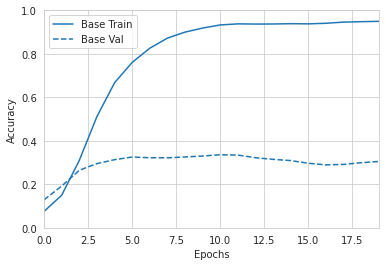

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(model_histories)
plt.ylim([0, 1])

Base Model + MaxPooling2D

In [ ]:
new_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model_histories['new'] = compile_and_train(new_model, 'model/New')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


395/395 [==============================] - 13s 31ms/step - loss: 5.0805 - accuracy: 0.0280 - val_loss: 4.2927 - val_accuracy: 0.0460
Epoch 2/20
395/395 [==============================] - 12s 31ms/step - loss: 3.9246 - accuracy: 0.0803 - val_loss: 3.5573 - val_accuracy: 0.1220
Epoch 3/20
395/395 [==============================] - 12s 31ms/step - loss: 3.2604 - accuracy: 0.1832 - val_loss: 2.8897 - val_accuracy: 0.2380
Epoch 4/20
395/395 [==============================] - 12s 31ms/step - loss: 2.7783 - accuracy: 0.2761 - val_loss: 2.6270 - val_accuracy: 0.3020
Epoch 5/20
395/395 [==============================] - 12s 31ms/step - loss: 2.4500 - accuracy: 0.3536 - val_loss: 2.4172 - val_accuracy: 0.3280
Epoch 6/20
395/395 [==============================] - 12s 31ms/step - loss: 2.1891 - accuracy: 0.4158 - val_loss: 2.3233 - val_accuracy: 0.3860
Epoch 7/20
395/395 [==============================] - 12s 31ms/step - loss: 2.0267 - accuracy: 0.4496 - val_loss: 2.1413 - val_accuracy: 0.4600
Epo

(0.0, 1.0)

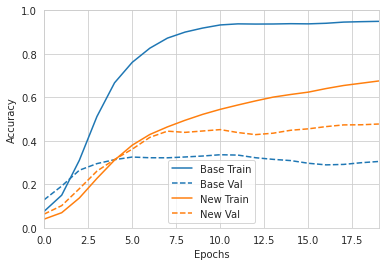

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(model_histories)
plt.ylim([0, 1])

Base Model + MaxPooling2D + Batch Normalization.

In [ ]:
new2_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model_histories['new2'] = compile_and_train(new2_model, 'model/New2')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


395/395 [==============================] - 15s 36ms/step - loss: 3.4459 - accuracy: 0.1914 - val_loss: 2.5699 - val_accuracy: 0.3500
Epoch 2/20
395/395 [==============================] - 14s 35ms/step - loss: 2.3130 - accuracy: 0.4258 - val_loss: 1.9066 - val_accuracy: 0.4860
Epoch 3/20
395/395 [==============================] - 14s 35ms/step - loss: 1.7684 - accuracy: 0.5451 - val_loss: 1.6135 - val_accuracy: 0.5620
Epoch 4/20
395/395 [==============================] - 14s 35ms/step - loss: 1.4346 - accuracy: 0.6256 - val_loss: 1.5234 - val_accuracy: 0.5820
Epoch 5/20
395/395 [==============================] - 14s 35ms/step - loss: 1.1945 - accuracy: 0.6872 - val_loss: 1.3999 - val_accuracy: 0.6160
Epoch 6/20
395/395 [==============================] - 14s 35ms/step - loss: 1.0092 - accuracy: 0.7360 - val_loss: 1.4717 - val_accuracy: 0.5860
Epoch 7/20
395/395 [==============================] - 14s 35ms/step - loss: 0.8572 - accuracy: 0.7727 - val_loss: 1.4724 - val_accuracy: 0.5860
Epo

(0.0, 1.0)

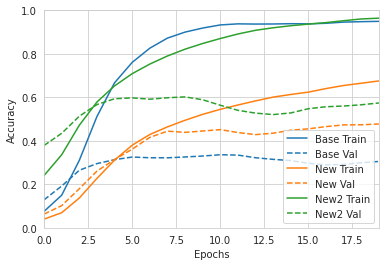

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(model_histories)
plt.ylim([0, 1])

Base Model + MaxPooling2D + Dropout(0.1)

In [ ]:
new3_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.1,),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.1,),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.1,),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.1,),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model_histories['new3'] = compile_and_train(new3_model, 'model/New3')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


395/395 [==============================] - 16s 38ms/step - loss: 5.2969 - accuracy: 0.0121 - val_loss: 4.6054 - val_accuracy: 0.0100
Epoch 2/20
395/395 [==============================] - 15s 37ms/step - loss: 4.6043 - accuracy: 0.0134 - val_loss: 4.6060 - val_accuracy: 0.0100
Epoch 3/20
395/395 [==============================] - 15s 39ms/step - loss: 4.6015 - accuracy: 0.0144 - val_loss: 4.6065 - val_accuracy: 0.0100
Epoch 4/20
395/395 [==============================] - 15s 37ms/step - loss: 4.6014 - accuracy: 0.0144 - val_loss: 4.6030 - val_accuracy: 0.0080
Epoch 5/20
395/395 [==============================] - 15s 37ms/step - loss: 4.5952 - accuracy: 0.0143 - val_loss: 4.5511 - val_accuracy: 0.0140
Epoch 6/20
395/395 [==============================] - 14s 36ms/step - loss: 4.5222 - accuracy: 0.0231 - val_loss: 4.4415 - val_accuracy: 0.0200
Epoch 7/20
395/395 [==============================] - 14s 36ms/step - loss: 4.4074 - accuracy: 0.0309 - val_loss: 4.2197 - val_accuracy: 0.0340
Epo

(0.0, 1.0)

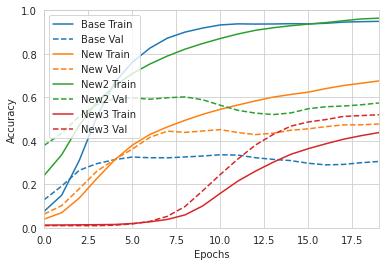

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(model_histories)
plt.ylim([0, 1])

Base Model + MaxPooling2D + Dropout(0.1) + BatchNormalization

In [ ]:
new4_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.1,),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.1,),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.1,),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.1,),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model_histories['new4'] = compile_and_train(new4_model, 'model/New4')

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


395/395 [==============================] - 27s 66ms/step - loss: 3.6742 - accuracy: 0.1409 - val_loss: 2.7527 - val_accuracy: 0.3240
Epoch 2/20
395/395 [==============================] - 25s 64ms/step - loss: 2.6655 - accuracy: 0.3295 - val_loss: 2.0188 - val_accuracy: 0.4900
Epoch 3/20
395/395 [==============================] - 25s 64ms/step - loss: 2.1736 - accuracy: 0.4343 - val_loss: 1.7948 - val_accuracy: 0.5040
Epoch 4/20
395/395 [==============================] - 25s 63ms/step - loss: 1.8794 - accuracy: 0.4987 - val_loss: 1.6388 - val_accuracy: 0.5540
Epoch 5/20
395/395 [==============================] - 25s 63ms/step - loss: 1.6947 - accuracy: 0.5432 - val_loss: 1.4049 - val_accuracy: 0.6060
Epoch 6/20
395/395 [==============================] - 25s 63ms/step - loss: 1.5535 - accuracy: 0.5784 - val_loss: 1.5498 - val_accuracy: 0.5680
Epoch 7/20
395/395 [==============================] - 26s 65ms/step - loss: 1.4349 - accuracy: 0.6021 - val_loss: 1.5035 - val_accuracy: 0.5740
Epo

(0.0, 1.0)

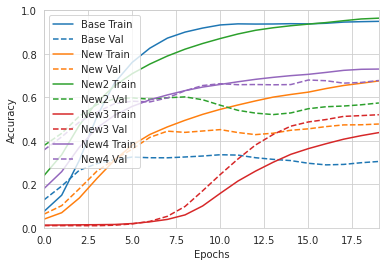

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(model_histories)
plt.ylim([0, 1])

Karena model new4 merupakan model yang paling bagus, maka akan kita gunakan model tersebut untuk modeil final kita.

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.1,),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.1,),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.1,),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.1,),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
#Compile the model 
model.compile(optimizer='adam',
                             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                             metrics=['accuracy'])

In [ ]:
#Train the model 
history = model.fit(train_ds,
                    validation_data=test_ds,
                    epochs = 20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


395/395 [==============================] - 28s 68ms/step - loss: 3.6628 - accuracy: 0.1524 - val_loss: 2.6980 - val_accuracy: 0.3380
Epoch 2/20
395/395 [==============================] - 26s 65ms/step - loss: 2.6014 - accuracy: 0.3467 - val_loss: 2.0199 - val_accuracy: 0.4900
Epoch 3/20
395/395 [==============================] - 25s 62ms/step - loss: 2.1174 - accuracy: 0.4473 - val_loss: 1.9953 - val_accuracy: 0.4480
Epoch 4/20
395/395 [==============================] - 25s 63ms/step - loss: 1.8495 - accuracy: 0.5121 - val_loss: 1.5137 - val_accuracy: 0.5860
Epoch 5/20
395/395 [==============================] - 25s 62ms/step - loss: 1.6494 - accuracy: 0.5548 - val_loss: 1.2985 - val_accuracy: 0.6340
Epoch 6/20
395/395 [==============================] - 25s 62ms/step - loss: 1.5097 - accuracy: 0.5844 - val_loss: 1.1881 - val_accuracy: 0.6860
Epoch 7/20
395/395 [==============================] - 24s 62ms/step - loss: 1.4019 - accuracy: 0.6136 - val_loss: 1.2180 - val_accuracy: 0.6700
Epo

In [ ]:
#Accuracy values for train and validation data
mean_absolute_error = history.history['accuracy']
val_mean_absolute_error = history.history['val_accuracy']

#Loss function values for train and validation data
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
# Get number of epochs
epochs   = range(len(mean_absolute_error))

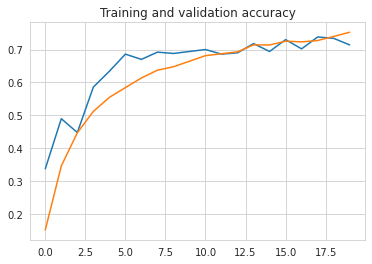

In [ ]:
#Plot the model accuracy
plt.plot(epochs, val_mean_absolute_error)
plt.plot(epochs, mean_absolute_error)
plt.title ('Training and validation accuracy')
plt.show()

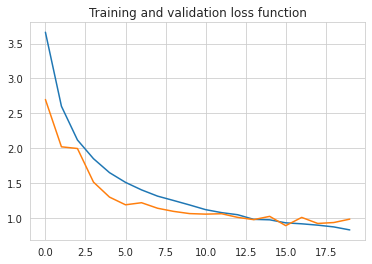

In [ ]:
#Plot the model loss function 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title ('Training and validation loss function')
plt.show()

In [ ]:
base_loss, base_acc = base_model.evaluate(test_ds, verbose=2)
final_loss, final_acc = model.evaluate(test_ds, verbose=2)
print('\nBase Model Accuracy :', base_acc)
print('\nFinal Model Accuracy :', final_acc)


16/16 - 1s - loss: 9.9149 - accuracy: 0.3040 - 800ms/epoch - 50ms/step
16/16 - 0s - loss: 0.9825 - accuracy: 0.7140 - 409ms/epoch - 26ms/step

Base Model Accuracy : 0.30399999022483826

Final Model Accuracy : 0.7139999866485596
